The **k-nearest neighbors (KNN)** algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both **classification** and **regression** problems. The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.
KNN captures the idea of similarity (sometimes called distance, proximity, or closeness) with some mathematics we might have learned in our childhood— calculating the distance between points on a graph.
There are other ways of calculating distance, and one way might be preferable depending on the problem we are solving. However, the straight-line distance (also called the Euclidean distance) is a popular and familiar choice.

The data we will use for regression looks like mtcars data as a form. I have worked on artificial neural networks with mtcars data before.

[Neural Network - Predict to Acceleration "R Application"](https://www.kaggle.com/hamzatanc/neural-network-arabalar-n-h-zlanmas-n-n-tahmini)

In [ ]:
import pandas as pd

cars_data = pd.read_csv("/home/biometric/Downloads/cars_new.csv")

In [ ]:
cars_data.shape

(406, 9)

Mtcars data consists of 392 observations and 7 variables. Considering that the K nearest neighbors algorithm is successful in small data, we can ignore the small size of the data.

In [ ]:
cars_data.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130,3504,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,165,3693,11.5,70,US
2,Plymouth Satellite,18.0,8,318.0,150,3436,11.0,70,US
3,AMC Rebel SST,16.0,8,304.0,150,3433,12.0,70,US
4,Ford Torino,17.0,8,302.0,140,3449,10.5,70,US


In [ ]:
cars_data_T = cars_data.describe().T
print(cars_data_T)

              count         mean         std     min     25%      50%  \
MPG           406.0    23.051232    8.401777     0.0    17.0    22.35   
Cylinders     406.0     5.475369    1.712160     3.0     4.0     4.00   
Displacement  406.0   194.779557  104.922458    68.0   105.0   151.00   
Horsepower    406.0   103.529557   40.520659     0.0    75.0    93.50   
Weight        406.0  2979.413793  847.004328  1613.0  2226.5  2822.50   
Acceleration  406.0    15.519704    2.803359     8.0    13.7    15.50   
Model         406.0    75.921182    3.748737    70.0    73.0    76.00   

                   75%     max  
MPG             29.000    46.6  
Cylinders        8.000     8.0  
Displacement   302.000   455.0  
Horsepower     129.000   230.0  
Weight        3618.250  5140.0  
Acceleration    17.175    24.8  
Model           79.000    82.0  


When I look at the distribution of data to quarters, accumulation did not attract my attention.

In [ ]:
cars_data_group = cars_data.groupby("Cylinders").count()

In this study, I want to filter according to the number of cylinders. For this reason, I will use the data of the "4 cylinder" vehicles with the highest frequency.

In [ ]:
cars_data_cylinders_4 = cars_data[cars_data.Cylinders == 4]
cars_data_drop_cylinders = cars_data.drop("Cylinders", axis = 1)
print(cars_data_cylinders_4)
#cars_data.head()

                              Car   MPG  Cylinders  Displacement  Horsepower  \
10           Citroen DS-21 Pallas   0.0          4         133.0         115   
20         Toyota Corolla Mark ii  24.0          4         113.0          95   
24                   Datsun PL510  27.0          4          97.0          88   
25   Volkswagen 1131 Deluxe Sedan  26.0          4          97.0          46   
26                    Peugeot 504  25.0          4         110.0          87   
..                            ...   ...        ...           ...         ...   
401               Ford Mustang GL  27.0          4         140.0          86   
402             Volkswagen Pickup  44.0          4          97.0          52   
403                 Dodge Rampage  32.0          4         135.0          84   
404                   Ford Ranger  28.0          4         120.0          79   
405                    Chevy S-10  31.0          4         119.0          82   

     Weight  Acceleration  Model  Origi

In [ ]:
print(cars_data_drop_cylinders)

                           Car   MPG  Displacement  Horsepower  Weight  \
0    Chevrolet Chevelle Malibu  18.0         307.0         130    3504   
1            Buick Skylark 320  15.0         350.0         165    3693   
2           Plymouth Satellite  18.0         318.0         150    3436   
3                AMC Rebel SST  16.0         304.0         150    3433   
4                  Ford Torino  17.0         302.0         140    3449   
..                         ...   ...           ...         ...     ...   
401            Ford Mustang GL  27.0         140.0          86    2790   
402          Volkswagen Pickup  44.0          97.0          52    2130   
403              Dodge Rampage  32.0         135.0          84    2295   
404                Ford Ranger  28.0         120.0          79    2625   
405                 Chevy S-10  31.0         119.0          82    2720   

     Acceleration  Model  Origin  
0            12.0     70      US  
1            11.5     70      US  
2     

In [ ]:
car_data_corr = cars_data.corr()
print(car_data_corr)

                   MPG  Cylinders  Displacement  Horsepower    Weight  \
MPG           1.000000  -0.735563     -0.764277   -0.726670 -0.787510   
Cylinders    -0.735563   1.000000      0.951787    0.823467  0.895220   
Displacement -0.764277   0.951787      1.000000    0.873758  0.932475   
Horsepower   -0.726670   0.823467      0.873758    1.000000  0.840811   
Weight       -0.787510   0.895220      0.932475    0.840811  1.000000   
Acceleration  0.424490  -0.522452     -0.557984   -0.682047 -0.430086   
Model         0.586234  -0.360762     -0.381714   -0.419929 -0.315389   

              Acceleration     Model  
MPG               0.424490  0.586234  
Cylinders        -0.522452 -0.360762  
Displacement     -0.557984 -0.381714  
Horsepower       -0.682047 -0.419929  
Weight           -0.430086 -0.315389  
Acceleration      1.000000  0.301992  
Model             0.301992  1.000000  


Our aim in the study is to predict the **acceleration** variable with the KNN model. So "acceleration" is our **dependent** variable. We can actually determine the variables that affect the performance of vehicles from life experience. We can think of this experience as **"Professional Knowledge"**, which has an important place in data science. I used the correlation table while determining the independent variables along with the experience. When determining the independent variables, we should be careful that the correlations with the dependent variable are large and the correlations between the independent variables are small.

I select the variables which I will use in the K Nearest Neighbors Regression model as "knn_regression_data".

In [ ]:
knn_regression_data = cars_data.loc[:,["Horsepower","Weight", "MPG","Displacement"]]
knn_regression_data.head()

,Horsepower,Weight,MPG,Displacement
0,130,3504,18.0,307.0
1,165,3693,15.0,350.0
2,150,3436,18.0,318.0
3,150,3433,16.0,304.0
4,140,3449,17.0,302.0


**Normalization** is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information. I use min/max normalizer. The min-max normalizer linearly rescales every feature to the [0,1] interval. Rescaling to the [0,1] interval is done by shifting the values of each feature so that the minimal value is 0, and then dividing by the new maximal value (which is the difference between the original maximal and minimal values).

![](http://bilgisayarkavramlari.sadievrenseker.com/wp-content/uploads/2012/01/normallesme6.png)

In [ ]:
import numpy as np

knn_regression_data = (knn_regression_data - np.min(knn_regression_data))/(np.max(knn_regression_data) - np.min(knn_regression_data))
knn_regression_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Horsepower,406.0,0.450129,0.176177,0.0,0.326087,0.406522,0.560870,1.0
Weight,406.0,0.387415,0.240149,0.0,0.173944,0.342926,0.568543,1.0
MPG,406.0,0.494662,0.180296,0.0,0.364807,0.479614,0.622318,1.0
Displacement,406.0,0.327596,0.271117,0.0,0.095607,0.214470,0.604651,1.0


When we examine the distribution of our normalized data, we see that the minimum value is equal to 0 and the maximum value is equal to 1.

I said that the data to be used in the regression model should be numerical. When we look at the types of variables with "dtypes", we see that they are float.

In [ ]:
knn_regression_data.dtypes

Horsepower      float64
Weight          float64
MPG             float64
Displacement    float64
dtype: object

In [ ]:
knn_independent = knn_regression_data.drop("Displacement", axis = 1)
knn_dependent = knn_regression_data["Displacement"] # I want estimate to acceleration

In [ ]:
from sklearn.model_selection import train_test_split

independent_train, independent_test, dependent_train, dependent_test = train_test_split(
    knn_independent,
    knn_dependent,
    test_size = 0.10,
    random_state = 20)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor().fit(independent_train, dependent_train)
predicted_values = knn_model.predict(independent_test)

In [ ]:
predict_df = pd.DataFrame({"Dependent_Test" : dependent_test, "Dependent_Predicted" : predicted_values})
predict_df.head()

,Dependent_Test,Dependent_Predicted
10,0.167959,0.606202
279,0.214470,0.218088
121,0.077519,0.124548
226,0.139535,0.112145
47,0.731266,0.680103


We have normalized the data before and gave values in the range of 0-1. I applied the reverse of the normalization process to see the real predictions with the code below.

In [ ]:
predict_df = (predict_df*(np.max(cars_data.Displacement) - np.min(cars_data.Displacement))) + np.min(cars_data.Displacement)
predict_df.head()

,Dependent_Test,Dependent_Predicted
10,133.0,302.6
279,151.0,152.4
121,98.0,116.2
226,122.0,111.4
47,351.0,331.2


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

print("Mean Squared Error = ", mean_squared_error(predict_df.Dependent_Predicted, predict_df.Dependent_Test))
print("Root Mean Squared Error = ", np.sqrt(mean_squared_error(predict_df.Dependent_Predicted, predict_df.Dependent_Test)))

Mean Squared Error =  1511.3151219512195
Root Mean Squared Error =  38.87563661152341


If we want to examine the success of the model with statistical methods, we can look at the MSE value. In statistics, the mean squared error (MSE) of an estimator (of a procedure for estimating an unobserved quantity) measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value.

![](https://veribilimcisi.files.wordpress.com/2017/07/83buy.png)

In [ ]:
r2_score(predict_df.Dependent_Predicted, predict_df.Dependent_Test)

0.8693898178960654

R-squared values range from 0 to 1 and are commonly stated as percentages from 0% to 100%. An R-squared of 100% means that all dependent variables are completely explained by movements in the index (or the independent variable(s) you are interested in).

## Parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
import numpy as np

knn_params = {"n_neighbors" : np.arange(1,11,1)}
knn = KNeighborsRegressor()
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)
knn_cv_model.fit(independent_train, dependent_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])})

In [ ]:
knn_cv_model.best_params_["n_neighbors"]

10

As a result of the Parameter Tuning process, we determined that the optimum neighbor number (k) is 9.

In [ ]:
knn_model = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"]).fit(independent_train, dependent_train)
predicted_values = knn_model.predict(independent_test)

In [ ]:
predict_df = pd.DataFrame({"Dependent_Test" : dependent_test, "Dependent_Predicted" : predicted_values})

In [ ]:
predict_df = (predict_df*(np.max(cars_data.Displacement) - np.min(cars_data.Displacement))) + np.min(cars_data.Displacement)
predict_df.head()

,Dependent_Test,Dependent_Predicted
10,133.0,268.4
279,151.0,157.8
121,98.0,109.2
226,122.0,106.3
47,351.0,334.2


In [ ]:
print("Mean Squared Error = ", mean_squared_error(predict_df.Dependent_Test, predict_df.Dependent_Predicted))
print("Root Mean Squared Error = ", np.sqrt(mean_squared_error(predict_df.Dependent_Test, predict_df.Dependent_Predicted)))

Mean Squared Error =  1304.2526829268293
Root Mean Squared Error =  36.11443870430259


We see that the mse value decreases in the use of optimum parameters.

In [ ]:
r2_score(predict_df.Dependent_Test, predict_df.Dependent_Predicted)

0.8981592541283511

In [ ]:
from sklearn.model_selection import cross_val_score

MSE = []
MSE_CV = []

for k in range(10):
    k = k + 1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(independent_train, dependent_train)
    y_pred = knn_model.predict(independent_test)
    mse = mean_squared_error(y_pred, dependent_test)
    mse_cv = -1 * cross_val_score(knn_model, independent_train,dependent_train, cv = 10,
                         scoring = "neg_mean_squared_error").mean()
    MSE.append(mse)
    MSE_CV.append(mse_cv)
    print("k =", k, "MSE :", mse, "MSE_CV:", mse_cv)

k = 1 MSE : 0.01694772551355103 MSE_CV: 0.009931784061568928
k = 2 MSE : 0.012774713709519162 MSE_CV: 0.008292234035660163
k = 3 MSE : 0.010996102923524813 MSE_CV: 0.007223055910729375
k = 4 MSE : 0.011385623290762082 MSE_CV: 0.006963648262881897
k = 5 MSE : 0.010090974246681353 MSE_CV: 0.00659315027825534
k = 6 MSE : 0.009262407739354923 MSE_CV: 0.006331474507277746
k = 7 MSE : 0.008647772522397287 MSE_CV: 0.006098212259218066
k = 8 MSE : 0.009149794443605754 MSE_CV: 0.006109439199843736
k = 9 MSE : 0.008719048131070557 MSE_CV: 0.006066106180549398
k = 10 MSE : 0.008708428866633477 MSE_CV: 0.005962099988587028


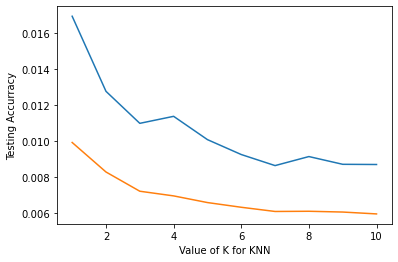

In [ ]:
import matplotlib.pyplot as plt

plt.plot(np.arange(1,11,1), MSE)
plt.plot(np.arange(1,11,1), MSE_CV)
plt.xlabel("Value of K for KNN")
plt.ylabel("Testing Accurracy");